#Load Data

In [1]:
from os import listdir
from PIL import Image as PImage
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint

In [40]:
def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    files_name = []
    for image in imagesList:
      hdu_list = fits.open(path + '/' + image)
      image_data = hdu_list[0].data
      loadedImages.append(image_data)
      files_name.append(image)
    hdu_list.close()
    return loadedImages, files_name

In [45]:
path = '../../data/images'
imgs, files_name = loadImages(path)

In [46]:
files_name[:5]

['img_105_Cluster.fits',
 'img_110_Cluster.fits',
 'img_114_Cluster.fits',
 'img_118_Cluster.fits',
 'img_119_Cluster.fits']

# Process to get number and labels of object

In [47]:
files_name[0:10]

['img_105_Cluster.fits',
 'img_110_Cluster.fits',
 'img_114_Cluster.fits',
 'img_118_Cluster.fits',
 'img_119_Cluster.fits',
 'img_120_Cluster.fits',
 'img_123_Cluster.fits',
 'img_124_Cluster.fits',
 'img_126_Cluster.fits',
 'img_128_Unknown.fits']

In [48]:
labeleds_list = []
for i in files_name:
  temp_ = i.split('.')[0].split('_')
  labeleds_list.append([temp_[1], temp_[2]])

In [49]:
# labeleds_list[:100]

#Preprocessing

In [50]:
imgs_arr = np.array(imgs,dtype=object)

In [51]:
print(imgs_arr[0])

[[0.16171345114707947 0.24052175879478455 0.25833073258399963 ...
  0.10889283567667007 0.11030440777540207 0.125051349401474]
 [0.19121626019477844 0.24945016205310822 0.2530887722969055 ...
  0.11311076581478119 0.13568583130836487 0.15618224442005157]
 [0.166133314371109 0.1975875049829483 0.16708222031593323 ...
  0.12897521257400513 0.15102127194404602 0.13249783217906952]
 ...
 [0.48619475960731506 1.2555543184280396 0.8099428415298462 ...
  0.15279483795166016 0.15458205342292786 0.17210446298122406]
 [0.6448031067848206 1.4218782186508179 1.2075152397155762 ...
  0.11129140853881836 0.11406870186328888 0.14872002601623535]
 [0.42532479763031006 0.7846765518188477 0.5815904140472412 ...
  0.1012457013130188 0.12074987590312958 0.13751114904880524]]


In [52]:
min_pixel = np.min(imgs_arr)
max_pixel = np.max(imgs_arr)
mean_pixel = np.mean(imgs_arr)
std_pixel = np.std(imgs_arr)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

c:\Users\news1\miniconda3\envs\narit\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Min: -0.8849602937698364
Max: 186.626708984375
Mean: nan
Stdev: nan


In [53]:
imgs_arr = imgs_arr.astype('float64')

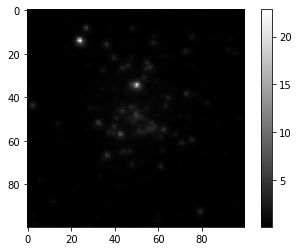

In [54]:
plt.imshow(imgs_arr[100], cmap='gray')
plt.colorbar()

In [55]:
imgs_arr.shape

(127, 100, 100)

# Fill death pixel with -100

In [56]:
imgs_arr_scaled = imgs_arr.copy()
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = -100

In [57]:
min_pixel = np.min(imgs_arr_scaled)
max_pixel = np.max(imgs_arr_scaled)
mean_pixel = np.mean(imgs_arr_scaled)
std_pixel = np.std(imgs_arr_scaled)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: -100.0
Max: 186.626708984375
Mean: 0.3235618737625006
Stdev: 1.4863883006711698


#Reshap Image

In [41]:
def reshape_for_model(origin_img):
  size, crop_x, crop_y = origin_img.shape
  return origin_img.reshape(size, (crop_x*crop_y))

In [42]:
def reshape_img(img, width = 100, height = 100):
  return img.reshape(width, width)

In [60]:
data_for_learn = reshape_for_model(imgs_arr_scaled)
data_for_learn.shape

(127, 10000)

# Normalize Data

## min max scale

In [61]:
# normalized_data = ((data_for_learn - min_pixel)/(max_pixel - min_pixel))

In [62]:
# print(np.min(normalized_data), np.max(normalized_data))

In [63]:
# normalized_data.shape

## rescale 0-255

In [64]:
normalized_data = ((data_for_learn - min_pixel)/(max_pixel - min_pixel)) * 255

In [65]:
print(np.min(normalized_data), np.max(normalized_data))

0.0 255.0


In [66]:
normalized_data[0]

array([89.10975889, 89.17987141, 89.19571532, ..., 89.05596322,
       89.07331528, 89.0882271 ])

In [67]:
normalized_data.shape

(127, 10000)

In [68]:
min_pixel = np.min(normalized_data)
max_pixel = np.max(normalized_data)
mean_pixel = np.mean(normalized_data)
std_pixel = np.std(normalized_data)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: 0.0
Max: 255.0
Mean: 89.25374878167419
Stdev: 1.3223785669318429


# Export images as a jpg

## local

In [69]:
path_to_save = '/content/drive/MyDrive/Master\'s Project (News)/jpg/local'

In [70]:
normalized_data[0]

array([89.10975889, 89.17987141, 89.19571532, ..., 89.05596322,
       89.07331528, 89.0882271 ])

In [71]:
labeleds_list[0][0], labeleds_list[0][1]

('105', 'Cluster')

In [72]:
a = reshape_img(data_for_learn[0])
a.shape

(100, 100)

In [73]:
# use the normalized data
a = reshape_img(normalized_data[0])
a.shape

(100, 100)

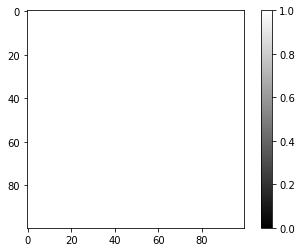

In [74]:
plt.imshow(a, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

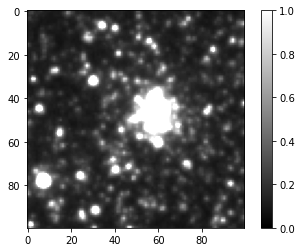

In [75]:
# without normalization
a = reshape_img(data_for_learn[0])
plt.imshow(a, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

In [79]:
min_pixel = np.min(data_for_learn)
max_pixel = np.max(data_for_learn)
mean_pixel = np.mean(data_for_learn)
std_pixel = np.std(data_for_learn)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: -100.0
Max: 186.626708984375
Mean: 0.3235618737625006
Stdev: 1.4863883006711698


In [ ]:
selected_data = data_for_learn
# selected_data = normalized_data

In [ ]:
dup_check = []
# for i in range(len(selected_data)):
  # img_ = reshape_img(selected_data[i])
  # if labeleds_list[i][0] in dup_check : # duplicate
  #   filename = "../../data/jpg/local_with_min_max/{}_{}.jpg".format(labeleds_list[i][0], 
  #                                                                                   dup_check.count(labeleds_list[i][0]))
  #   plt.imsave(filename, img_, cmap='gray', vmin=0, vmax=1)
  #   dup_check.append(labeleds_list[i][0])
  # else:
  #   filename = "../../data/jpg/local_with_min_max/{}.jpg".format(labeleds_list[i][0])
  #   plt.imsave(filename, img_, cmap='gray', vmin=0, vmax=1)
  #   dup_check.append(labeleds_list[i][0])

In [ ]:
# dup_check = []
# for i in range(len(selected_data)):
#   img_ = reshape_img(selected_data[i])
#   if labeleds_list[i][0] in dup_check : # duplicate
#     filename = "/content/drive/MyDrive/Master's Project (News)/jpg/local/{}_{}.jpg".format(labeleds_list[i][0], 
#                                                                                          dup_check.count(labeleds_list[i][0]))
#     plt.imsave(filename, img_, cmap='gray')
#     dup_check.append(labeleds_list[i][0])
#   else:
#     filename = "/content/drive/MyDrive/Master's Project (News)/jpg/local/{}.jpg".format(labeleds_list[i][0])
#     plt.imsave(filename, img_, cmap='gray')
#     dup_check.append(labeleds_list[i][0])

## global

In [15]:
# path = '../data/scaled_fits/'
path = '../../data/fits/'
imgs, files_name = loadImages(path)

In [16]:
labeleds_list = []
for i in files_name:
  temp_ = i.split('.')[0].split('_')
#   print(temp_)
  labeleds_list.append(temp_)

In [17]:
files_name

['1.fits',
 '10.fits',
 '2.fits',
 '3.fits',
 '4.fits',
 '5.fits',
 '6.fits',
 '7.fits',
 '8.fits',
 '9.fits']

In [20]:
plt.rcParams["figure.figsize"] = (10,10)

In [21]:
from matplotlib.colors import LogNorm

TypeError: Image data of dtype object cannot be converted to float

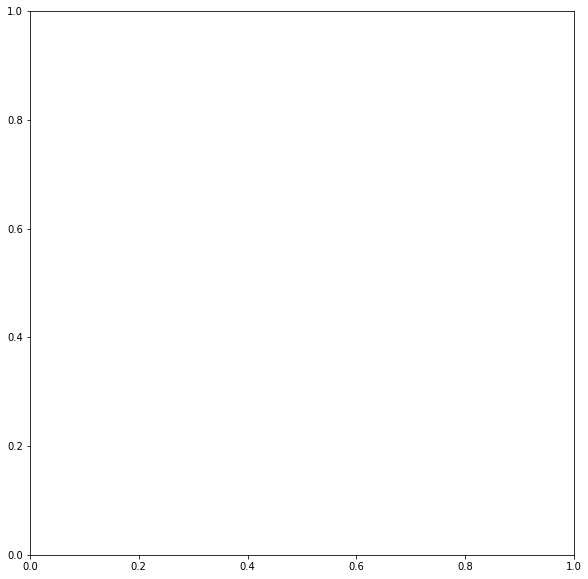

In [22]:
# plt.imshow(imgs[0], cmap='gray', vmin=0, vmax=1)
plt.imshow(imgs[0], cmap='gray')
plt.colorbar()

In [ ]:
dup_check = []
for i in range(len(imgs)):
  img_ = imgs[i]
  # if labeleds_list[i][0] in dup_check : # duplicate
  #   filename = "../../data/jpg/global/{}_{}.jpg".format(labeleds_list[i][0], 
  #                                                                                        dup_check.count(labeleds_list[i][0]))
  #   plt.imsave(filename, img_, cmap='gray')
  #   dup_check.append(labeleds_list[i][0])
  # else:
  #   filename = "../../data/jpg/global/{}.jpg".format(labeleds_list[i][0])
  #   plt.imsave(filename, img_, cmap='gray')
  #   dup_check.append(labeleds_list[i][0])

In [ ]:
# dup_check = []
# for i in range(len(imgs)):
#   img_ = imgs[i]
#   if labeleds_list[i][0] in dup_check : # duplicate
#     filename = "../../data/jpg/global_with_min_max/{}_{}.jpg".format(labeleds_list[i][0], 
#                                                                                          dup_check.count(labeleds_list[i][0]))
#     plt.imsave(filename, img_, cmap='gray', vmin=0, vmax=1)
#     dup_check.append(labeleds_list[i][0])
#   else:
#     filename = "../../data/jpg/global_with_min_max/{}.jpg".format(labeleds_list[i][0])
#     plt.imsave(filename, img_, cmap='gray', vmin=0, vmax=1)
#     dup_check.append(labeleds_list[i][0])

# Plot Example Data

In [ ]:
normalized_data[0]

array([89.10975889, 89.17987141, 89.19571532, ..., 89.05596322,
       89.07331528, 89.0882271 ])

In [ ]:
normalized_data[0].shape

(10000,)

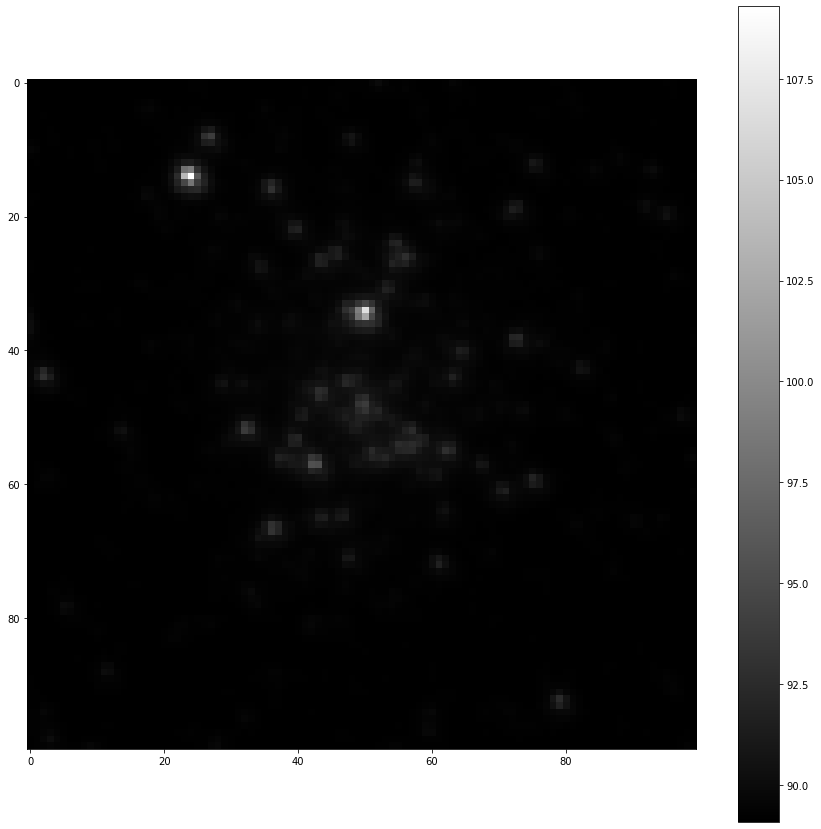

In [ ]:
plt.imshow(reshape_img(normalized_data[100]), cmap='gray')
plt.colorbar()

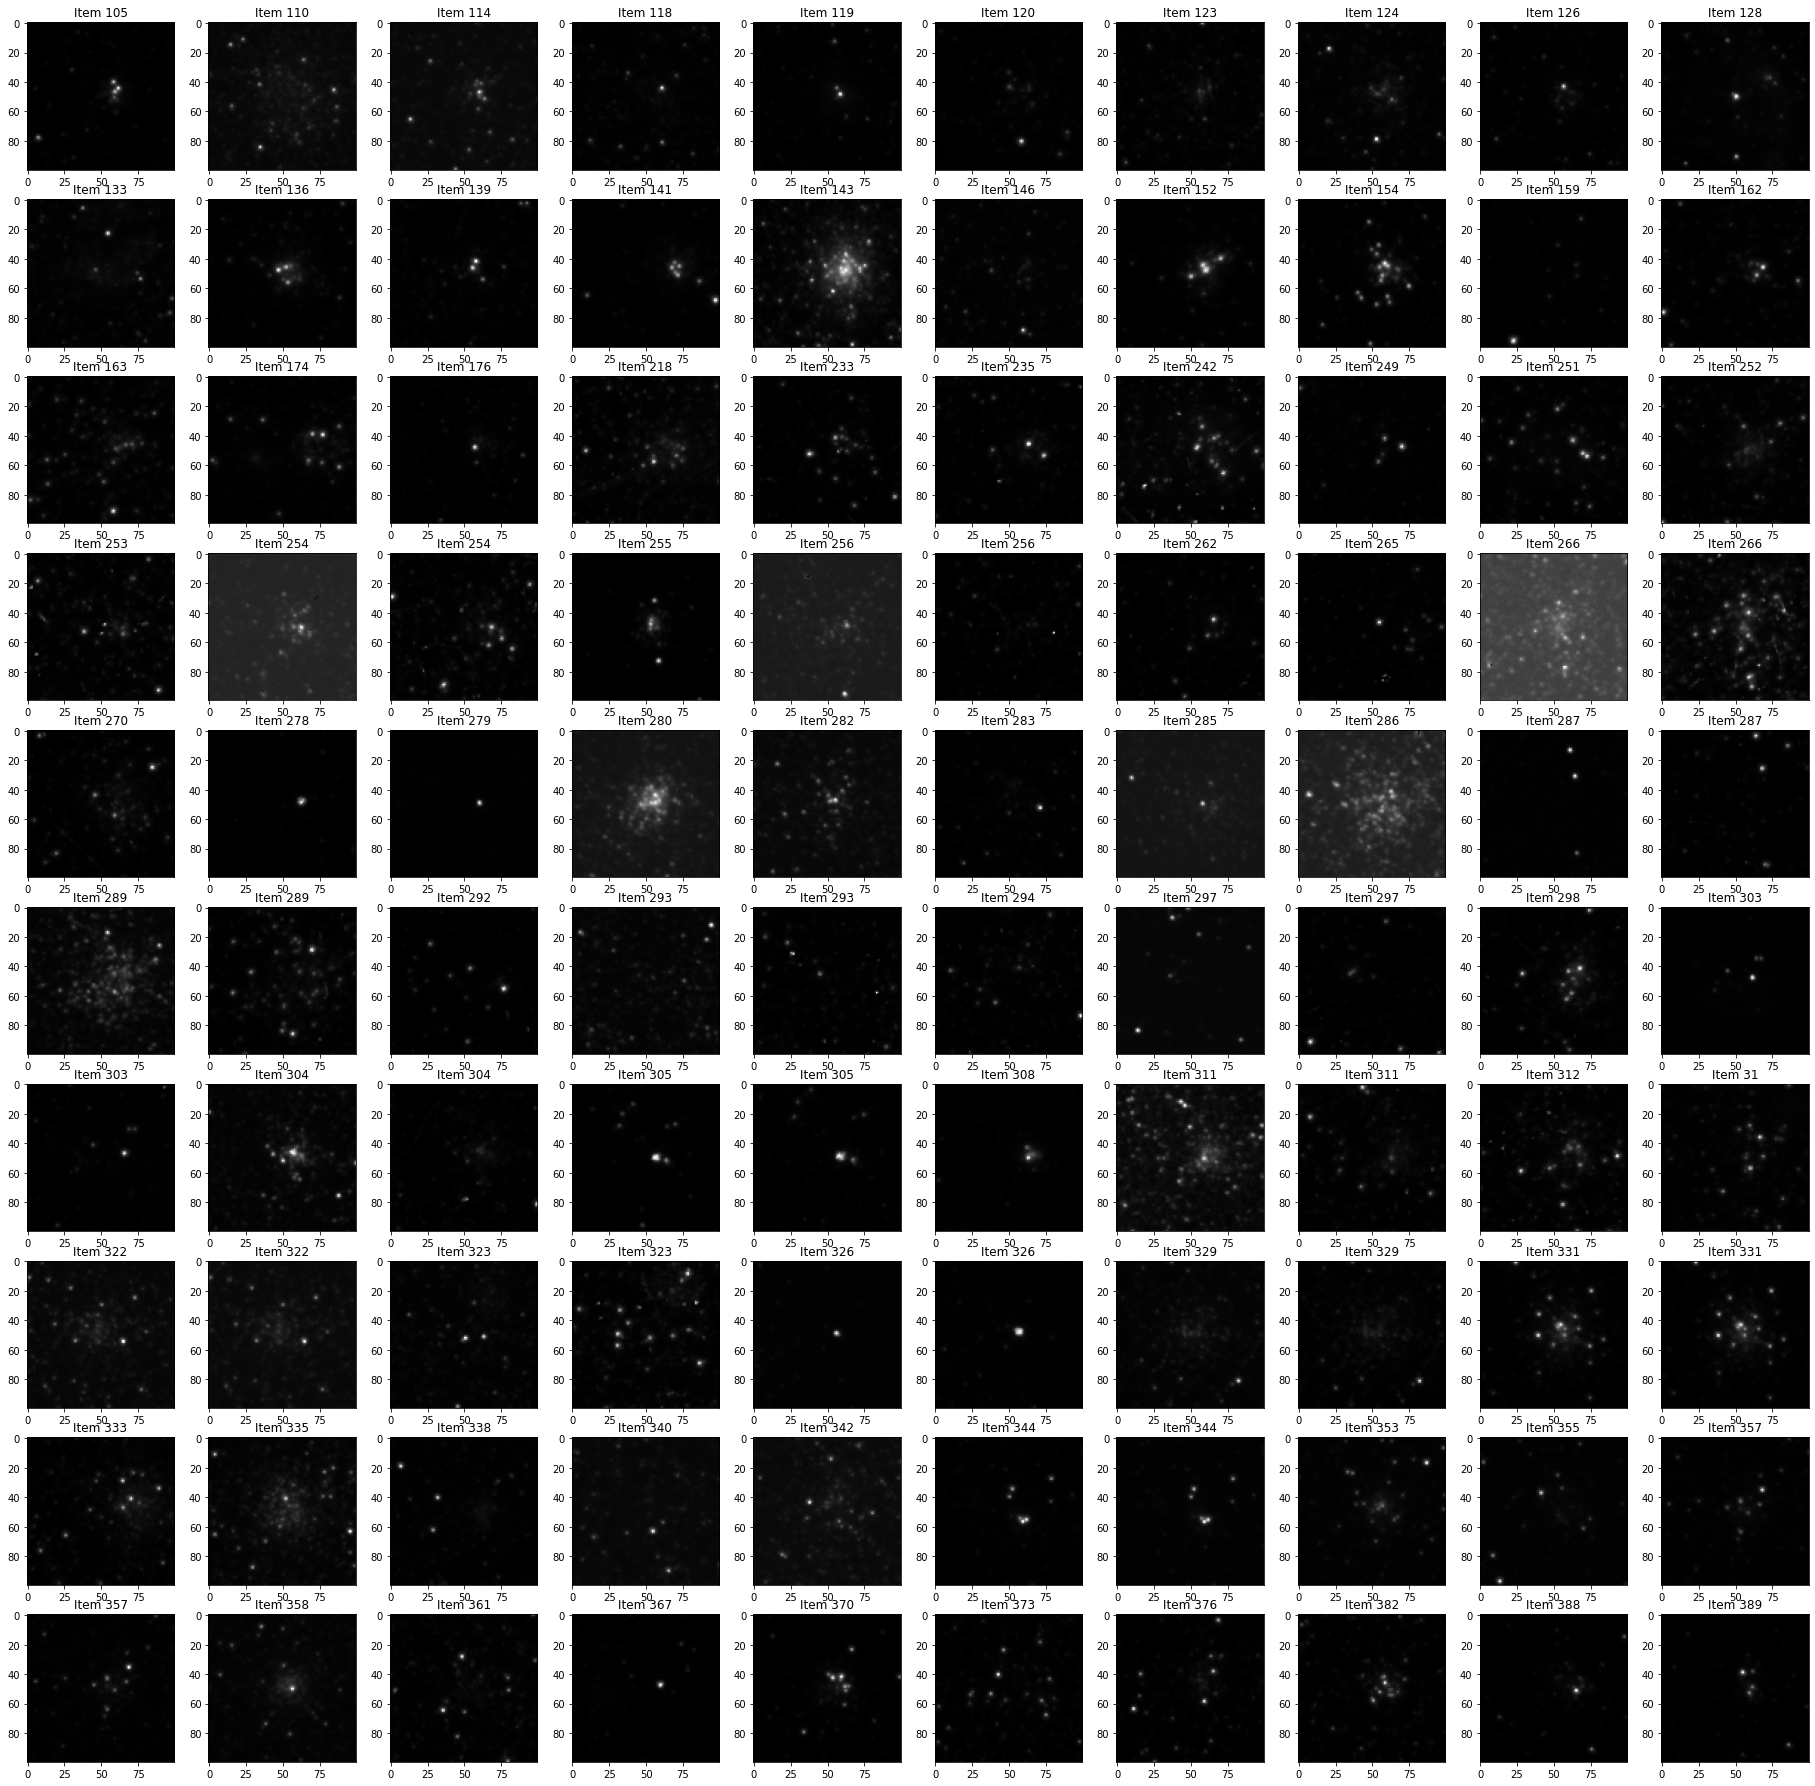

In [ ]:
plt.figure(figsize=(32, 32)) # specifying the overall grid size
index_ = 1
try:
  for i in range(len(normalized_data)):
    plt.subplot(10, 10, index_)
    plt.imshow(reshape_img(normalized_data[i]), cmap='gray')
    plt.title("Item {}".format(labeleds_list[i][0]))
    index_ += 1
except:
  pass
plt.show()

# Export the Features

In [ ]:
ind_ = []
lab_ = []
for i in labeleds_list:
  lab_.append(i[1])
  ind_.append(i[0])

In [ ]:
ind_arr = np.array(ind_)
lab_arr = np.array(lab_)

In [ ]:
normalized_data[0].shape, arr[0].shape

((10000,), (2,))

In [ ]:
arr[0][0], arr[0][1]

('255', 'Cluster')

In [ ]:
df = pd.DataFrame(normalized_data)
df['label'] = pd.DataFrame(lab_)
df['object_index'] = pd.DataFrame(ind_)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,label,object_index
0,89.097119,89.181202,89.405952,89.589793,89.376688,89.329118,90.142003,91.499417,90.545400,89.515859,...,89.202465,89.136982,89.124984,89.135825,89.154057,89.243031,89.208753,89.155796,Cluster,255
1,89.018007,89.021463,89.026470,89.026516,89.027220,89.021111,89.030080,89.041811,89.066178,89.120806,...,89.022966,89.020106,89.021060,89.024456,89.027584,89.030083,89.025957,89.023342,Cluster,254
2,89.049930,89.088277,89.067882,89.059134,89.076960,89.084333,89.102634,89.129416,89.118214,89.088871,...,89.062892,89.069242,89.134967,89.162135,89.157668,89.091523,89.057530,89.032415,Cluster,254
3,89.029896,89.029567,89.049038,89.046665,89.047181,89.040696,89.028588,89.017677,89.020201,89.020759,...,89.078312,89.052061,89.043303,89.034592,89.031627,89.029200,89.035860,89.060920,Cluster,253
4,89.035824,89.031872,89.024056,89.023906,89.025654,89.026047,89.023626,89.032217,89.033008,89.026863,...,89.031194,89.044278,89.045088,89.036864,89.041070,89.041948,89.030032,89.029235,Cluster,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,89.127422,89.186852,89.240914,89.621034,89.719309,89.347889,89.161144,89.132015,89.149708,89.164015,...,89.194790,89.277423,89.240666,89.197445,89.167256,89.140141,89.151885,89.164931,Cluster,81
123,89.218016,89.178375,89.202193,89.262606,89.246961,89.181396,89.164999,89.142604,89.165152,89.219581,...,91.682551,90.749593,89.762791,89.353235,89.231808,89.236754,89.219772,89.185733,Cluster,95
124,89.046271,89.033872,89.026638,89.027454,89.026943,89.034859,89.045678,89.063985,89.089362,89.088783,...,89.034448,89.042088,89.045169,89.055707,89.050537,89.045796,89.041474,89.053335,Unknown,98
125,89.071702,89.089640,89.042980,89.031734,89.027028,89.025479,89.029372,89.033199,89.028678,89.023856,...,89.047729,89.044479,89.035006,89.027018,89.030803,89.027064,89.020607,89.017191,Stellar,69


In [ ]:
# df.to_csv(r'dataset.csv', index = False)

# Handle with death pixel in big FITS

In [23]:
number_of_file = 1

In [24]:
# fits_image_filename = fits.util.get_testdata_filepath('../data/fits/{}.fits'.format(number_of_file))
hdu_list = fits.open('../../data/fits/{}.fits'.format(number_of_file))
hdu_list.info()

Filename: ../data/fits/1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     931   ()      
  1  SCI           1 ImageHDU        83   (5932, 5926)   float32   
  2  WHT           1 ImageHDU        44   (5932, 5926)   float32   
  3  CTX           1 ImageHDU        37   (5932, 5926)   int32   
  4  HDRTAB        1 BinTableHDU    638   10R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, D, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 5A, 7A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 6A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, D,

In [25]:
image_data = hdu_list['SCI'].data

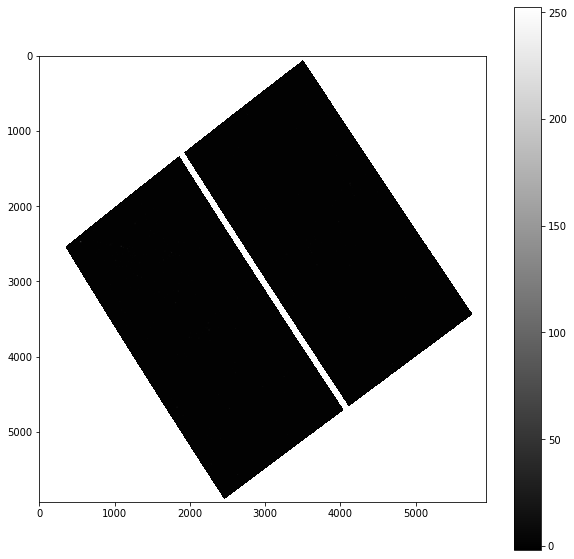

In [27]:
plt.imshow(image_data, cmap='gray', vmin=0, vmax=1)
# plt.imshow(image_data, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

In [28]:
min_pixel = np.min(image_data)
max_pixel = np.max(image_data)
mean_pixel = np.mean(image_data)
std_pixel = np.std(image_data)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: nan
Max: nan
Mean: nan
Stdev: nan


## Fill death pixel with -100

In [63]:
imgs_arr_scaled = image_data.copy()
# imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = -100
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = 0

""" 
from this experiment, we know that scaled to 0 is better than scaled to 100
"""

' \nfrom this experiment, we know that scaled to 0 is better than scaled to 100\n'

In [64]:
min_pixel = np.min(imgs_arr_scaled)
max_pixel = np.max(imgs_arr_scaled)
mean_pixel = np.mean(imgs_arr_scaled)
std_pixel = np.std(imgs_arr_scaled)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: -2.1283004
Max: 252.58537
Mean: 0.07558934
Stdev: 0.48000315


## Visulization

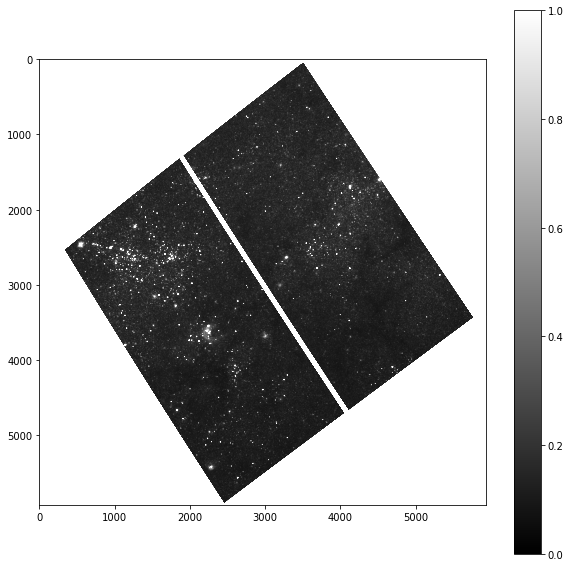

In [51]:
plt.imshow(imgs_arr_scaled, cmap='gray', vmin=0, vmax=1)
# plt.imshow(imgs_arr_scaled, cmap='gray')
# plt.imshow(imgs[0], norm=LogNorm(), cmap=plt.cm.Greys,
#                 interpolation='bilinear')
# plt.imshow(imgs[0], cmap='Greys')
plt.colorbar()

## Export new fits

In [52]:
hdu = fits.PrimaryHDU(imgs_arr_scaled) # save img into google drive
hdulist = fits.HDUList([hdu])
# path = '../data/scaled_fits/{}.fits'.format(number_of_file)
path = 'C:/Users/news1/desktop/{}.fits'.format(number_of_file)
hdulist.writeto(path)